# Animal Welfare Calculator
* See this doc for details: https://docs.google.com/document/d/1uFxgcfYCh269Ooe-LQLaPOhOke4lrcRKPZYlZogDW34/edit?tab=t.0

# Animal welfare calculator

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%config InlineBackend.figure_format='retina'

In [3]:
blue='#3ac3f2'
pink='#ed2685'
gray='#aaaaaa'
lightgray='#cccccc'
verylightgray='#dddddd'
yellow='#f1d321'
orange='#f58032'
green='#12ed9d'
red='#ed1262'
purple='#9D75FE'

# Farmed animals

In [4]:
farm_df = pd.read_excel('Animal welfare calculator.xlsx', sheet_name='Farmed Animals')

### Replicate foodimacts.org
As a test, compare these results to the <rect> widths of the bars on the https://foodimpacts.org/ website. 

Before comparing, make sure that:
* You have moved the Welfare slider to 99%
* Shrimp is still in the df. (It is deleted later in this notebook.)

Shrimp should be 460, hen egg should be about 23.8, and farmed salmong should be about 15.1. The small, <5% differences between my test results and foodimpacts is because the slider won't go to 100%.

In [5]:
assert 'shrimp' in farm_df['species'].values, 'Shrimp is not in the farm_df. Make sure to include shrimp for this test. May require re-reading the file.'
farm_df['foodimpacts_scores'] = farm_df['lifespan_days']/farm_df['meat_weight_kg'] * farm_df['kg_per_2k_calories'] * farm_df['welfare_range'] * farm_df['elasticity_ace']
farm_df['foodimpacts_scores_normalized'] = farm_df['foodimpacts_scores']/farm_df['foodimpacts_scores'].max() * 460
farm_df[['species', 'foodimpacts_scores_normalized']].sort_values(by='foodimpacts_scores_normalized', ascending=False)

,species,foodimpacts_scores_normalized
0,shrimp,460.000000
1,caged_hen,22.737759
3,farmed_salmon,14.628563
2,broiler,6.573502
4,turkey,3.364759
5,pig,0.942082
7,beef_cow,0.603679
6,dairy_cow,0.071829


### Calculate suffering per 2000 calories

In [6]:
farm_df['animals_per_2000_calories'] = 1 / farm_df['meat_weight_kg'] * farm_df['kg_per_2k_calories']
farm_df['days_per_2000_calories'] = farm_df['animals_per_2000_calories'] * farm_df['lifespan_days']
farm_df['adjusted_suffering_per_animal_per_day'] = farm_df['unadjusted_suffering_per_animal_per_day'] * farm_df['welfare_range']
farm_df['adjusted_suffering_per_animal_per_2000_calories'] = farm_df['adjusted_suffering_per_animal_per_day'] * farm_df['days_per_2000_calories']
farm_df = farm_df.sort_values(by='adjusted_suffering_per_2000_calories', ascending=False).reset_index(drop=True)
farm_df = farm_df[farm_df['label'] != 'Shrimp']
farm_df

,species,label,food_label,lifespan_days,elasticity_ace,elasticity_cbp,meat_weight_kg,kg_per_2k_calories,animals_per_2000_calories,welfare_range,unadjusted_suffering_per_animal_per_day,adjusted_suffering_per_animal_per_day,days_per_2000_calories,adjusted_suffering_per_2000_calories,foodimpacts_scores,foodimpacts_scores_normalized,adjusted_suffering_per_animal_per_2000_calories
1,caged_hen,Caged hen (eggs),Caged eggs,504,0.91,0.91,20.50,1.2903,0.062941,0.332,7,2.324,31.722498,73.723084,9.584001,22.737759,73.723084
2,broiler,Chicken,Chicken,42,0.30,0.30,1.83,1.2121,0.662350,0.332,7,2.324,27.818689,64.650632,2.770741,6.573502,64.650632
3,turkey,Turkey,Turkey,126,0.33,0.76,10.30,1.0582,0.102738,0.332,7,2.324,12.944971,30.084112,1.418251,3.364759,30.084112
4,farmed_salmon,Salmon,Salmon,720,0.43,0.43,2.73,0.9709,0.355641,0.056,2,0.112,256.061538,28.678892,6.165962,14.628563,28.678892
5,pig,Pig,Pig,183,0.57,0.74,91.10,0.6734,0.007392,0.515,7,3.605,1.352714,4.876532,0.397089,0.942082,4.876532
6,dairy_cow,Dairy cow,Milk,2009,0.45,0.56,50420.00,3.2787,0.000065,0.515,-1,-0.515,0.130641,-0.067280,0.030276,0.071829,-0.067280
7,beef_cow,Beef cow,Beef,402,0.50,0.68,339.00,0.8333,0.002458,0.515,-1,-0.515,0.988161,-0.508903,0.254451,0.603679,-0.508903


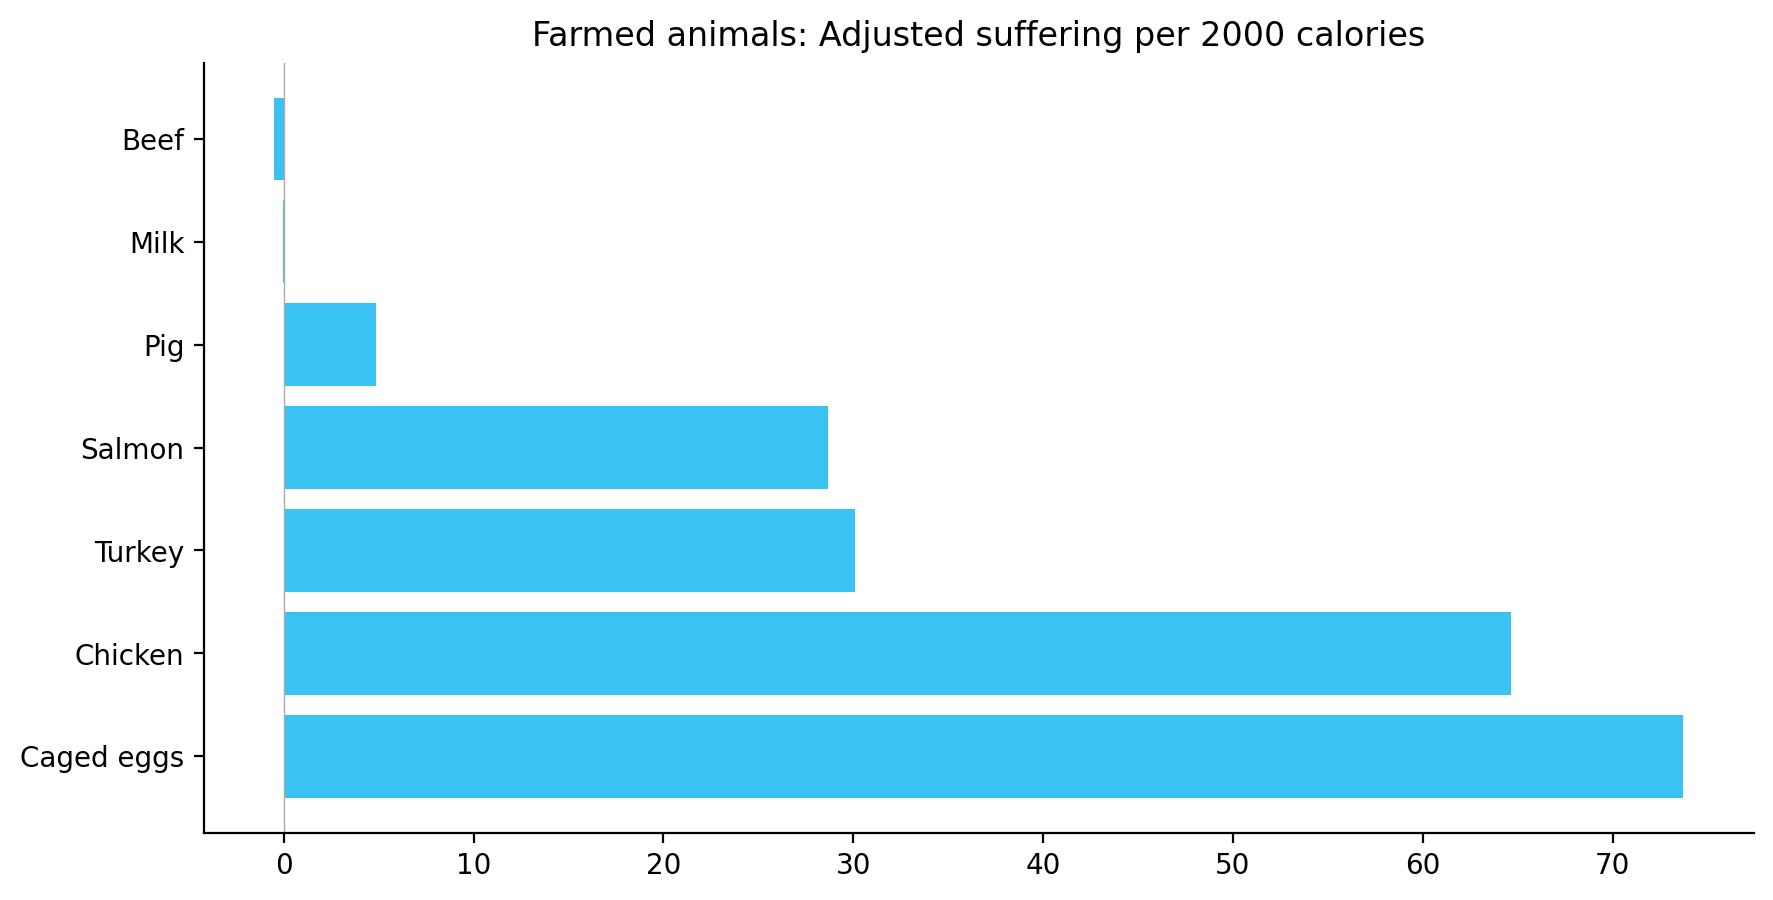

In [7]:
plt.figure(figsize=(10, 5))
plt.barh(farm_df['food_label'], farm_df['adjusted_suffering_per_2000_calories'], color=blue)
plt.axvline(x=0, color=gray, linewidth=0.5)
plt.title('Farmed animals: Adjusted suffering per 2000 calories')
sns.despine()


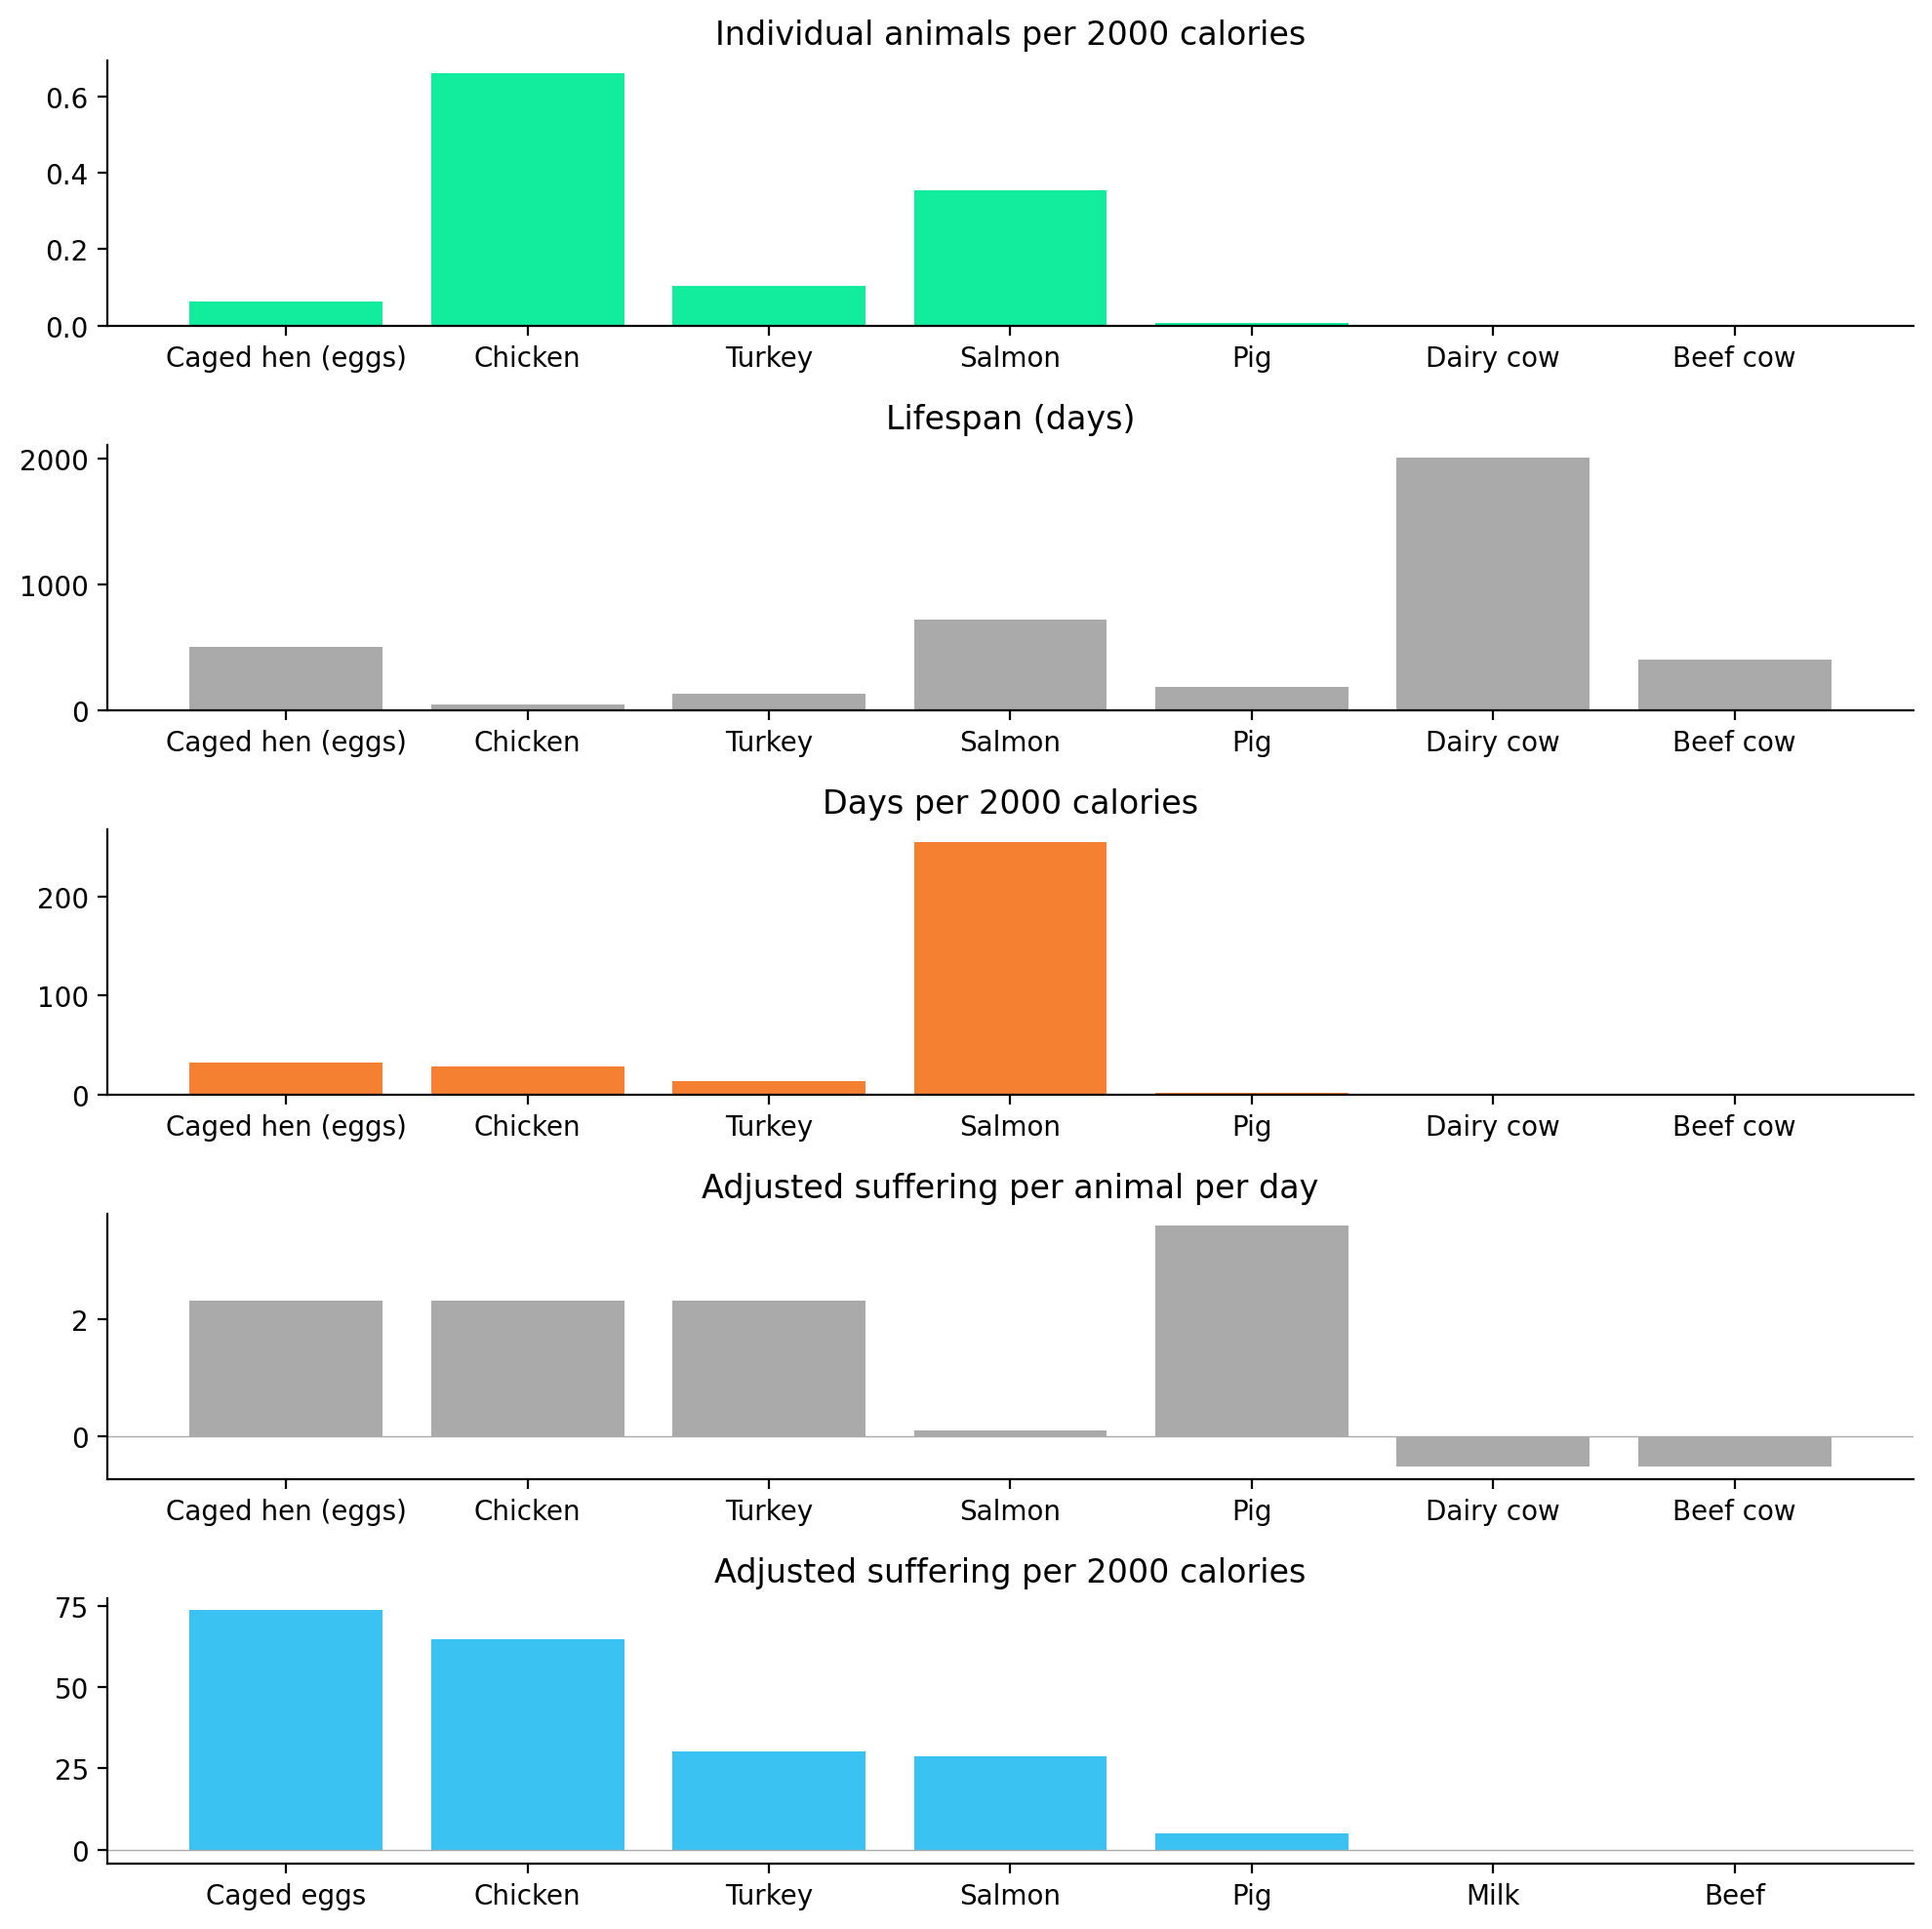

In [8]:
fig, axes = plt.subplots(5, 1, figsize=(10, 10))

plt.sca(axes[0]); plt.bar(farm_df['label'], farm_df['animals_per_2000_calories'], color=green)
plt.title('Individual animals per 2000 calories')

plt.sca(axes[1]); plt.bar(farm_df['label'], farm_df['lifespan_days'], color=gray)
plt.title('Lifespan (days)')

plt.sca(axes[2]); plt.bar(farm_df['label'], farm_df['days_per_2000_calories'], color=orange)
plt.title('Days per 2000 calories')


plt.sca(axes[3]); plt.bar(farm_df['label'], farm_df['adjusted_suffering_per_animal_per_day'], color=gray)
plt.axhline(y=0, color=gray, linewidth=0.5)
plt.title('Adjusted suffering per animal per day')

plt.sca(axes[4]); plt.bar(farm_df['food_label'], farm_df['adjusted_suffering_per_2000_calories'], color=blue)
plt.axhline(y=0, color=gray, linewidth=0.5)
plt.title('Adjusted suffering per 2000 calories')
sns.despine()
plt.tight_layout()



# Wild animals

In [11]:
meat_fraction_of_weight = 0.5
energy_per_100g = 175
salmon_welfare_range = .056 # https://rethinkpriorities.org/research-area/welfare-range-estimates/

In [12]:
wild_df = pd.read_excel('Animal welfare calculator.xlsx', sheet_name='Wild Animals')
wild_df = wild_df[['species', 'weight_kg', 'natural_lifespan_days', 'unadjusted_welfare_per_animal_per_day']]
wild_df = wild_df.dropna()


In [13]:
king_salmon_weight_kg = wild_df[wild_df['species'] == 'King salmon']['weight_kg'].values[0]


In [14]:
wild_df['welfare_range'] = (wild_df['weight_kg']/king_salmon_weight_kg)**0.1 * salmon_welfare_range

In [15]:
wild_df['adjusted_welfare_per_animal_per_day'] = wild_df['unadjusted_welfare_per_animal_per_day'] * wild_df['welfare_range']
wild_df['energy_kcal'] = wild_df['weight_kg'] * meat_fraction_of_weight * 10 * energy_per_100g
wild_df['days_lost'] = wild_df['natural_lifespan_days']/2
wild_df['animals_per_2000_kcal'] = 1 / (wild_df['energy_kcal']/2000)
wild_df['life_days_deprived_per_2000_kcal'] = wild_df['animals_per_2000_kcal'] * wild_df['days_lost']
wild_df['adjusted_welfare_deprived_per_2000_kcal'] = wild_df['life_days_deprived_per_2000_kcal'] * wild_df['adjusted_welfare_per_animal_per_day']
wild_df = wild_df.sort_values(by='adjusted_welfare_deprived_per_2000_kcal', ascending=False).reset_index(drop=True)
wild_df

,species,weight_kg,natural_lifespan_days,unadjusted_welfare_per_animal_per_day,welfare_range,adjusted_welfare_per_animal_per_day,energy_kcal,days_lost,animals_per_2000_kcal,life_days_deprived_per_2000_kcal,adjusted_welfare_deprived_per_2000_kcal
0,Herring (Atlantic),0.22686,2737.5,1.0,0.03787,0.03787,198.502722,1368.75,10.075429,13790.742856,522.250287
1,Mackerel,0.680581,3650.0,1.0,0.042267,0.042267,595.508167,1825.00,3.358476,6129.219047,259.064732
2,Coho salmon,4.537205,1277.5,1.0,0.051097,0.051097,3970.054447,638.75,0.503771,321.784,16.442145
3,King salmon,11.343013,1825.0,1.0,0.056,0.056,9925.136113,912.50,0.201509,183.876571,10.297088
4,Yellowfin tuna,40.834846,2372.5,1.0,0.063653,0.063653,35730.490022,1186.25,0.055975,66.399873,4.226545


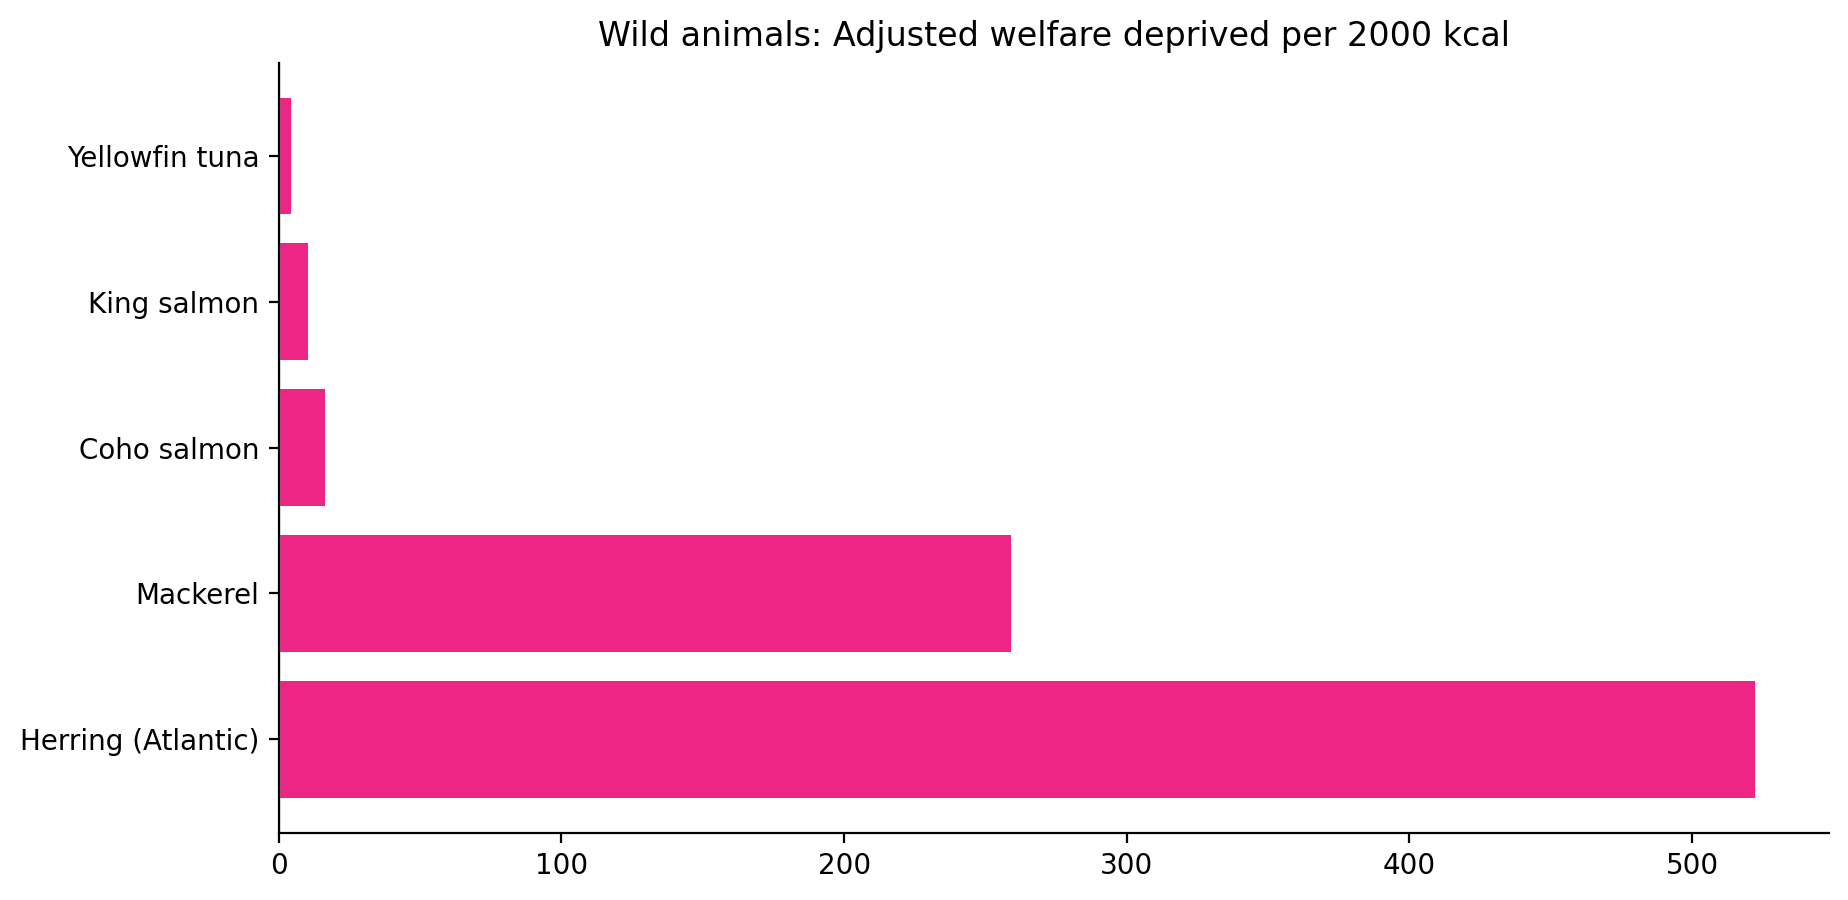

In [26]:
plt.figure(figsize=(10, 5))
plt.barh(wild_df['species'], wild_df['adjusted_welfare_deprived_per_2000_kcal'], color=pink)
plt.axvline(x=0, color=gray, linewidth=0.5)
plt.title('Wild animals: Adjusted welfare deprived per 2000 kcal')
sns.despine()

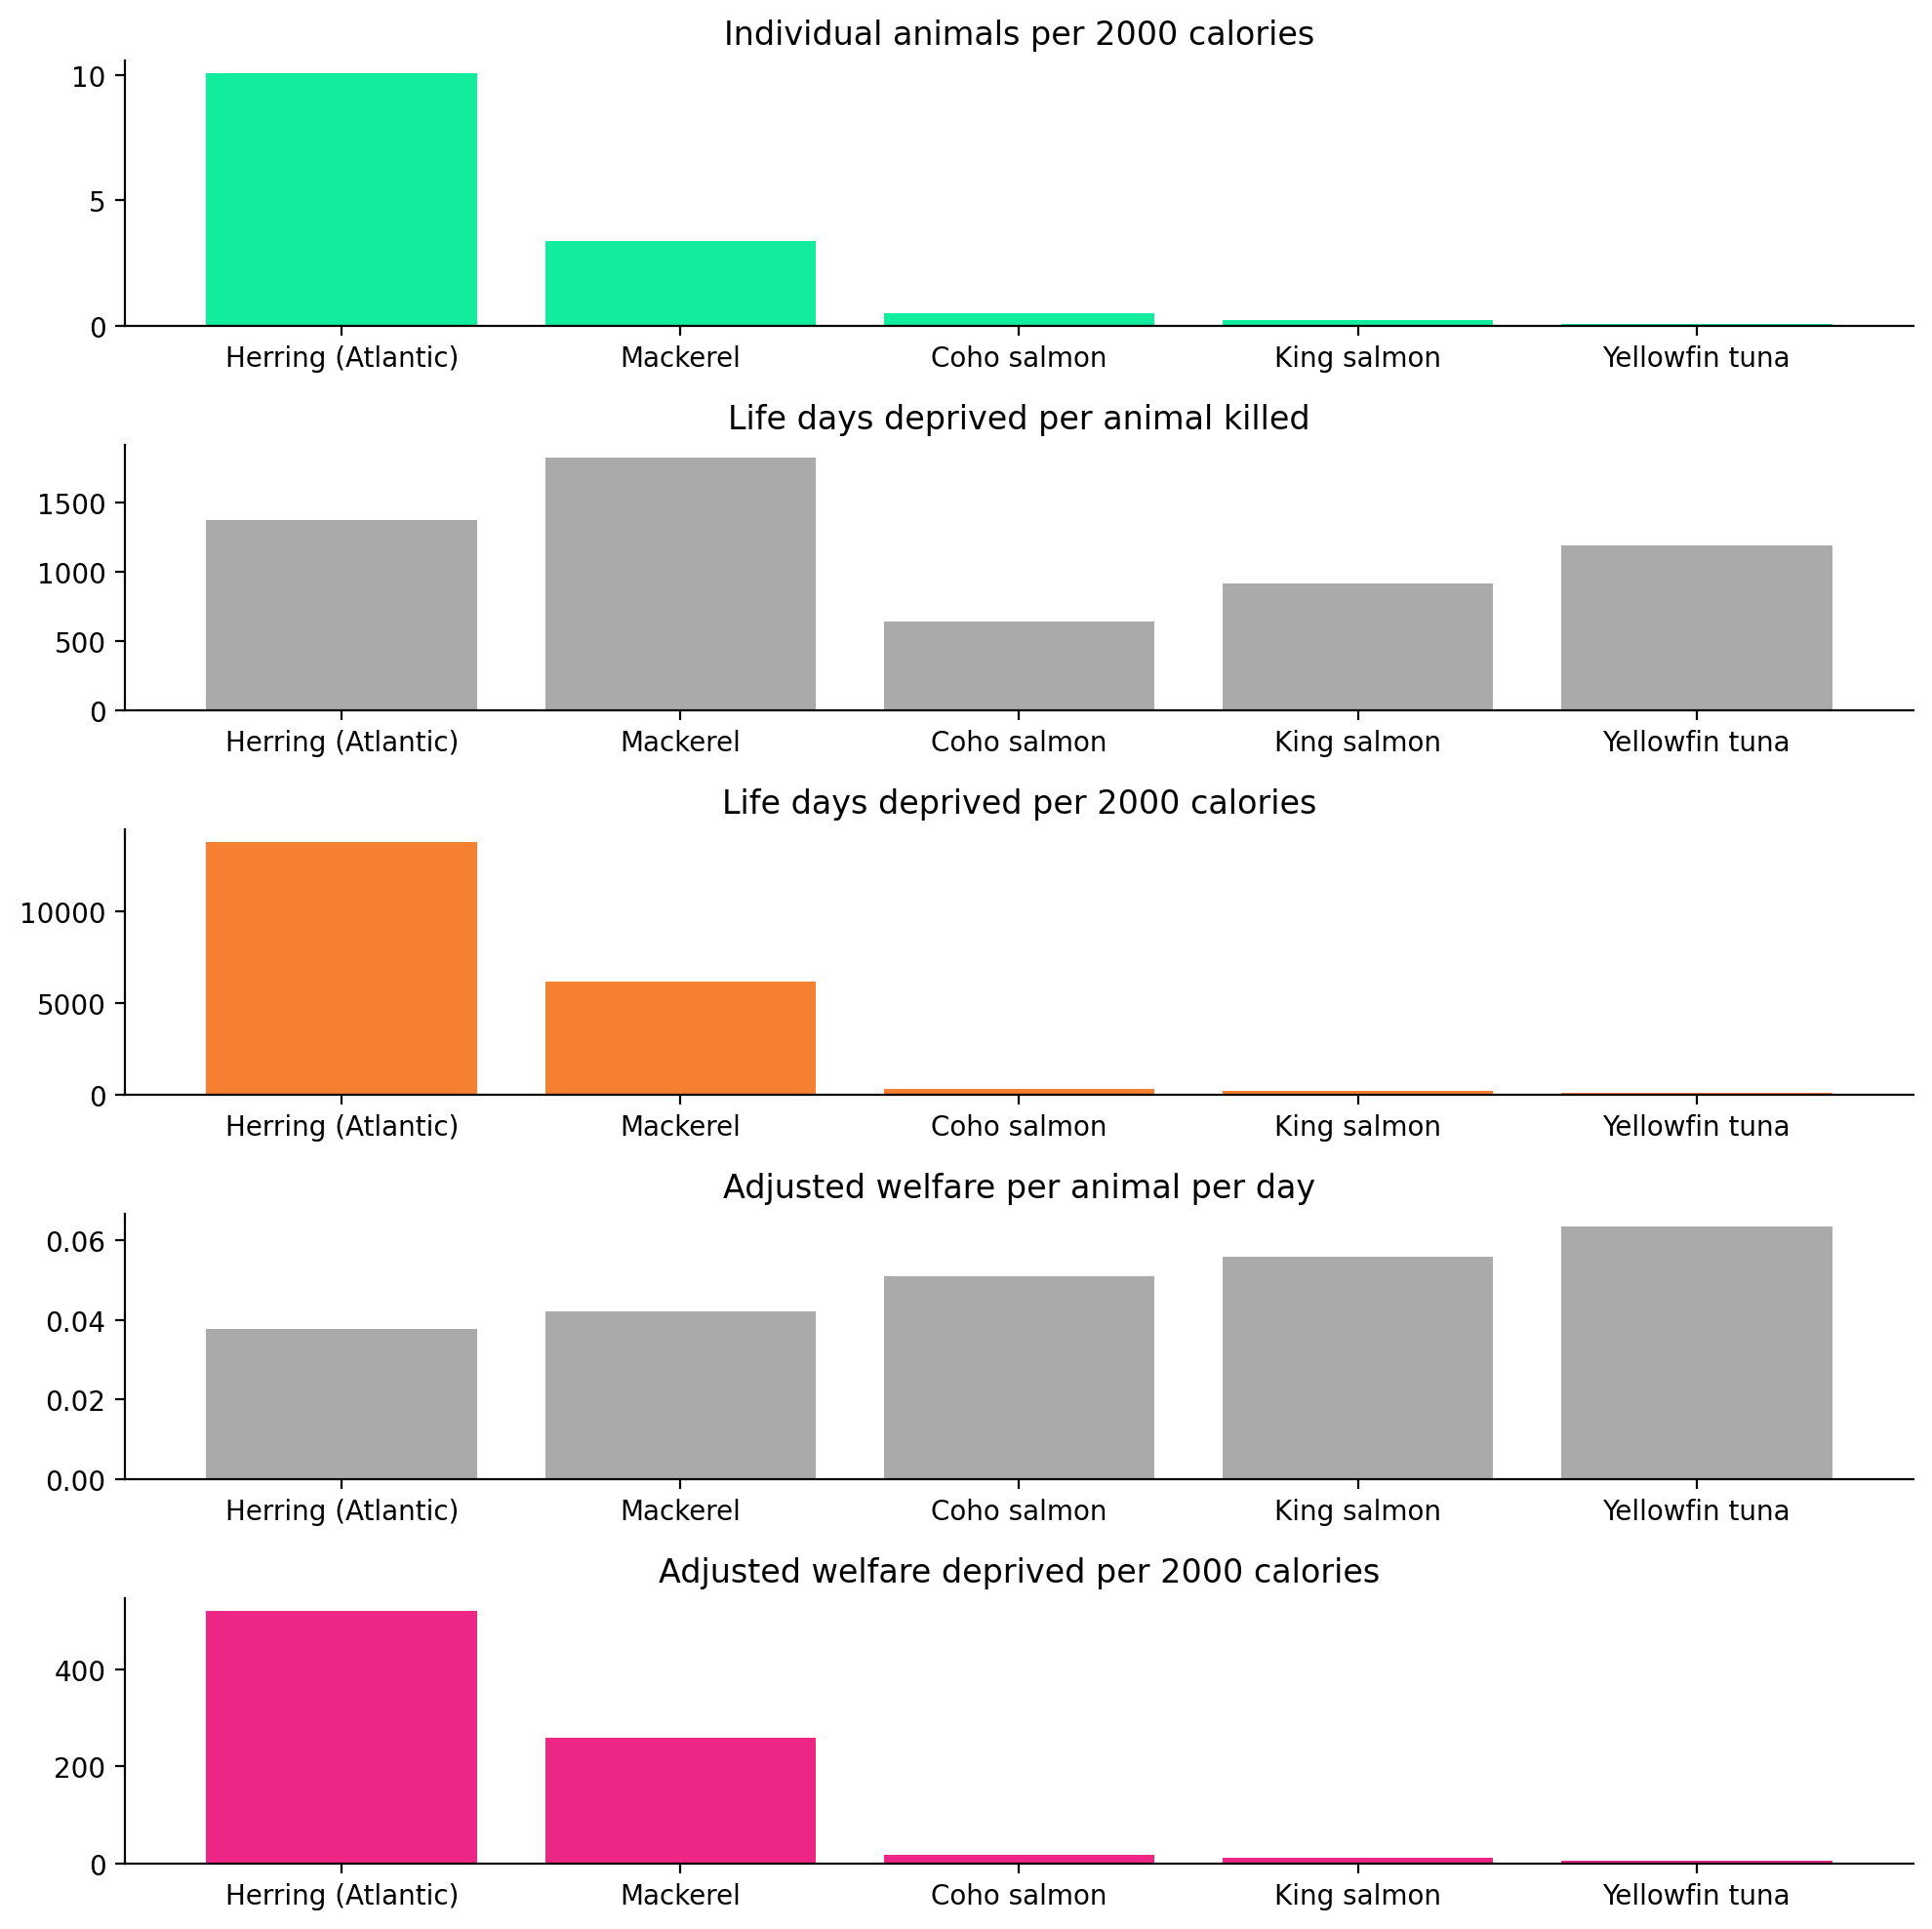

In [27]:
fig, axes = plt.subplots(5, 1, figsize=(10, 10))

plt.sca(axes[0]); plt.bar(wild_df['species'], wild_df['animals_per_2000_kcal'], color=green)
plt.axhline(y=0, color=gray, linewidth=0.5)
plt.title('Individual animals per 2000 calories')

plt.sca(axes[1]); plt.bar(wild_df['species'], wild_df['days_lost'], color=gray)
plt.axhline(y=0, color=gray, linewidth=0.5)
plt.title('Life days deprived per animal killed')

plt.sca(axes[2]); plt.bar(wild_df['species'], wild_df['life_days_deprived_per_2000_kcal'], color=orange)
plt.axhline(y=0, color=gray, linewidth=0.5)
plt.title('Life days deprived per 2000 calories')

plt.sca(axes[3]); plt.bar(wild_df['species'], wild_df['adjusted_welfare_per_animal_per_day'], color=gray)
plt.axhline(y=0, color=gray, linewidth=0.5)
plt.title('Adjusted welfare per animal per day')

plt.sca(axes[4]); plt.bar(wild_df['species'], wild_df['adjusted_welfare_deprived_per_2000_kcal'], color=pink)
plt.title('Adjusted welfare deprived per 2000 calories')
sns.despine()
plt.tight_layout()

In [18]:
wild_df

,species,weight_kg,natural_lifespan_days,unadjusted_welfare_per_animal_per_day,welfare_range,adjusted_welfare_per_animal_per_day,energy_kcal,days_lost,animals_per_2000_kcal,life_days_deprived_per_2000_kcal,adjusted_welfare_deprived_per_2000_kcal
0,Herring (Atlantic),0.22686,2737.5,1.0,0.03787,0.03787,198.502722,1368.75,10.075429,13790.742856,522.250287
1,Mackerel,0.680581,3650.0,1.0,0.042267,0.042267,595.508167,1825.00,3.358476,6129.219047,259.064732
2,Coho salmon,4.537205,1277.5,1.0,0.051097,0.051097,3970.054447,638.75,0.503771,321.784,16.442145
3,King salmon,11.343013,1825.0,1.0,0.056,0.056,9925.136113,912.50,0.201509,183.876571,10.297088
4,Yellowfin tuna,40.834846,2372.5,1.0,0.063653,0.063653,35730.490022,1186.25,0.055975,66.399873,4.226545


In [21]:
farm_df_to_concat = farm_df[['food_label', 'unadjusted_suffering_per_animal_per_day', 'adjusted_suffering_per_animal_per_day', 'adjusted_suffering_per_2000_calories']].reset_index(drop=True)
farm_df_to_concat['unadjusted_welfare_per_animal_per_day'] = -farm_df_to_concat['unadjusted_suffering_per_animal_per_day']
farm_df_to_concat['adjusted_welfare_per_animal_per_day'] = -farm_df_to_concat['adjusted_suffering_per_animal_per_day']
farm_df_to_concat['adjusted_welfare_lost_per_2000_calories'] = farm_df_to_concat['adjusted_suffering_per_2000_calories']
farm_df_to_concat['animal_type'] = 'farmed'

wild_df_to_concat = wild_df[['species', 'unadjusted_welfare_per_animal_per_day', 'adjusted_welfare_per_animal_per_day', 'adjusted_welfare_deprived_per_2000_kcal']].reset_index(drop=True)
wild_df_to_concat['adjusted_welfare_lost_per_2000_calories'] = wild_df_to_concat['adjusted_welfare_deprived_per_2000_kcal'] # standardizing naming
wild_df_to_concat['food_label'] = wild_df_to_concat['species']
wild_df_to_concat['animal_type'] = 'wild'

df = pd.concat([farm_df_to_concat[['food_label', 'unadjusted_welfare_per_animal_per_day', 'adjusted_welfare_per_animal_per_day', 'adjusted_welfare_lost_per_2000_calories', 'animal_type']].reset_index(drop=True),
                wild_df_to_concat[['food_label', 'unadjusted_welfare_per_animal_per_day', 'adjusted_welfare_per_animal_per_day', 'adjusted_welfare_lost_per_2000_calories', 'animal_type']].reset_index(drop=True)])
df = df.sort_values(by='adjusted_welfare_lost_per_2000_calories', ascending=False).reset_index(drop=True)

In [22]:
def plot_combined_bars(df, y_col, title, orientation, include_ticks=True):
    fdf = df[df['animal_type'] == 'farmed']
    wdf = df[df['animal_type'] == 'wild']
    if orientation == 'horizontal':
        plt.barh(fdf.index, fdf[y_col], color=blue, label='Farmed')
        plt.barh(wdf.index, wdf[y_col], color=pink, label='Wild')
        plt.axvline(x=0, color=gray, linewidth=0.5)
        if include_ticks:
            plt.yticks(range(len(df)), df['food_label'])
        else:
            plt.yticks([])
    elif orientation == 'vertical':
        plt.bar(fdf.index, fdf[y_col], color=blue, label='Farmed')
        plt.bar(wdf.index, wdf[y_col], color=pink, label='Wild')
        plt.axhline(y=0, color=gray, linewidth=0.5)
        if include_ticks:
            plt.xticks(range(len(df)), df['food_label'], rotation=30, ha='right')
        else:
            plt.xticks([])
    plt.legend()
    plt.title(title)
    sns.despine()



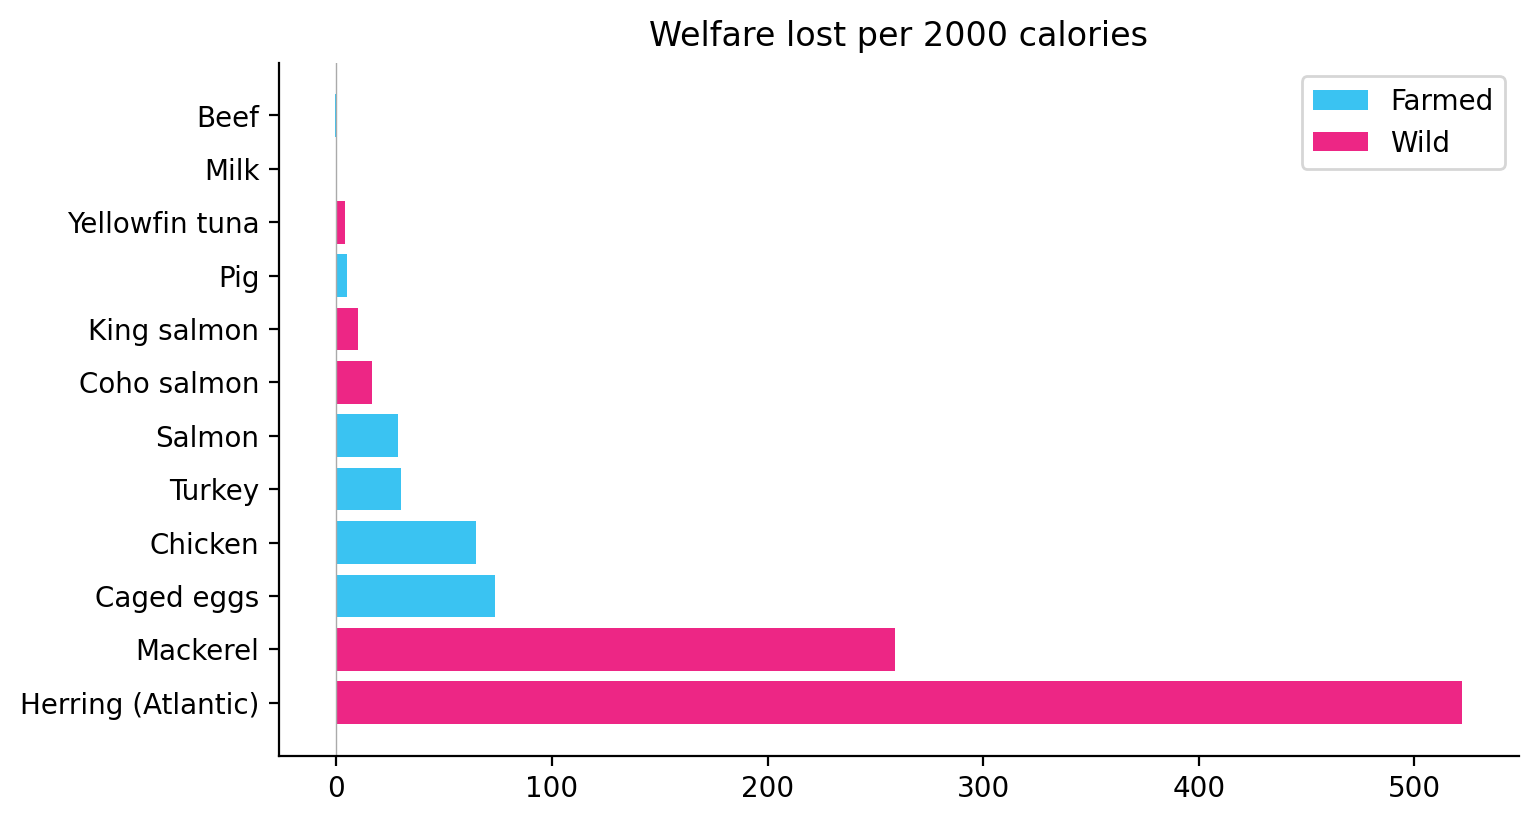

In [23]:
plt.figure(figsize=(8, 4.5))
plot_combined_bars(df, 'adjusted_welfare_lost_per_2000_calories', 'Welfare lost per 2000 calories', orientation='horizontal')

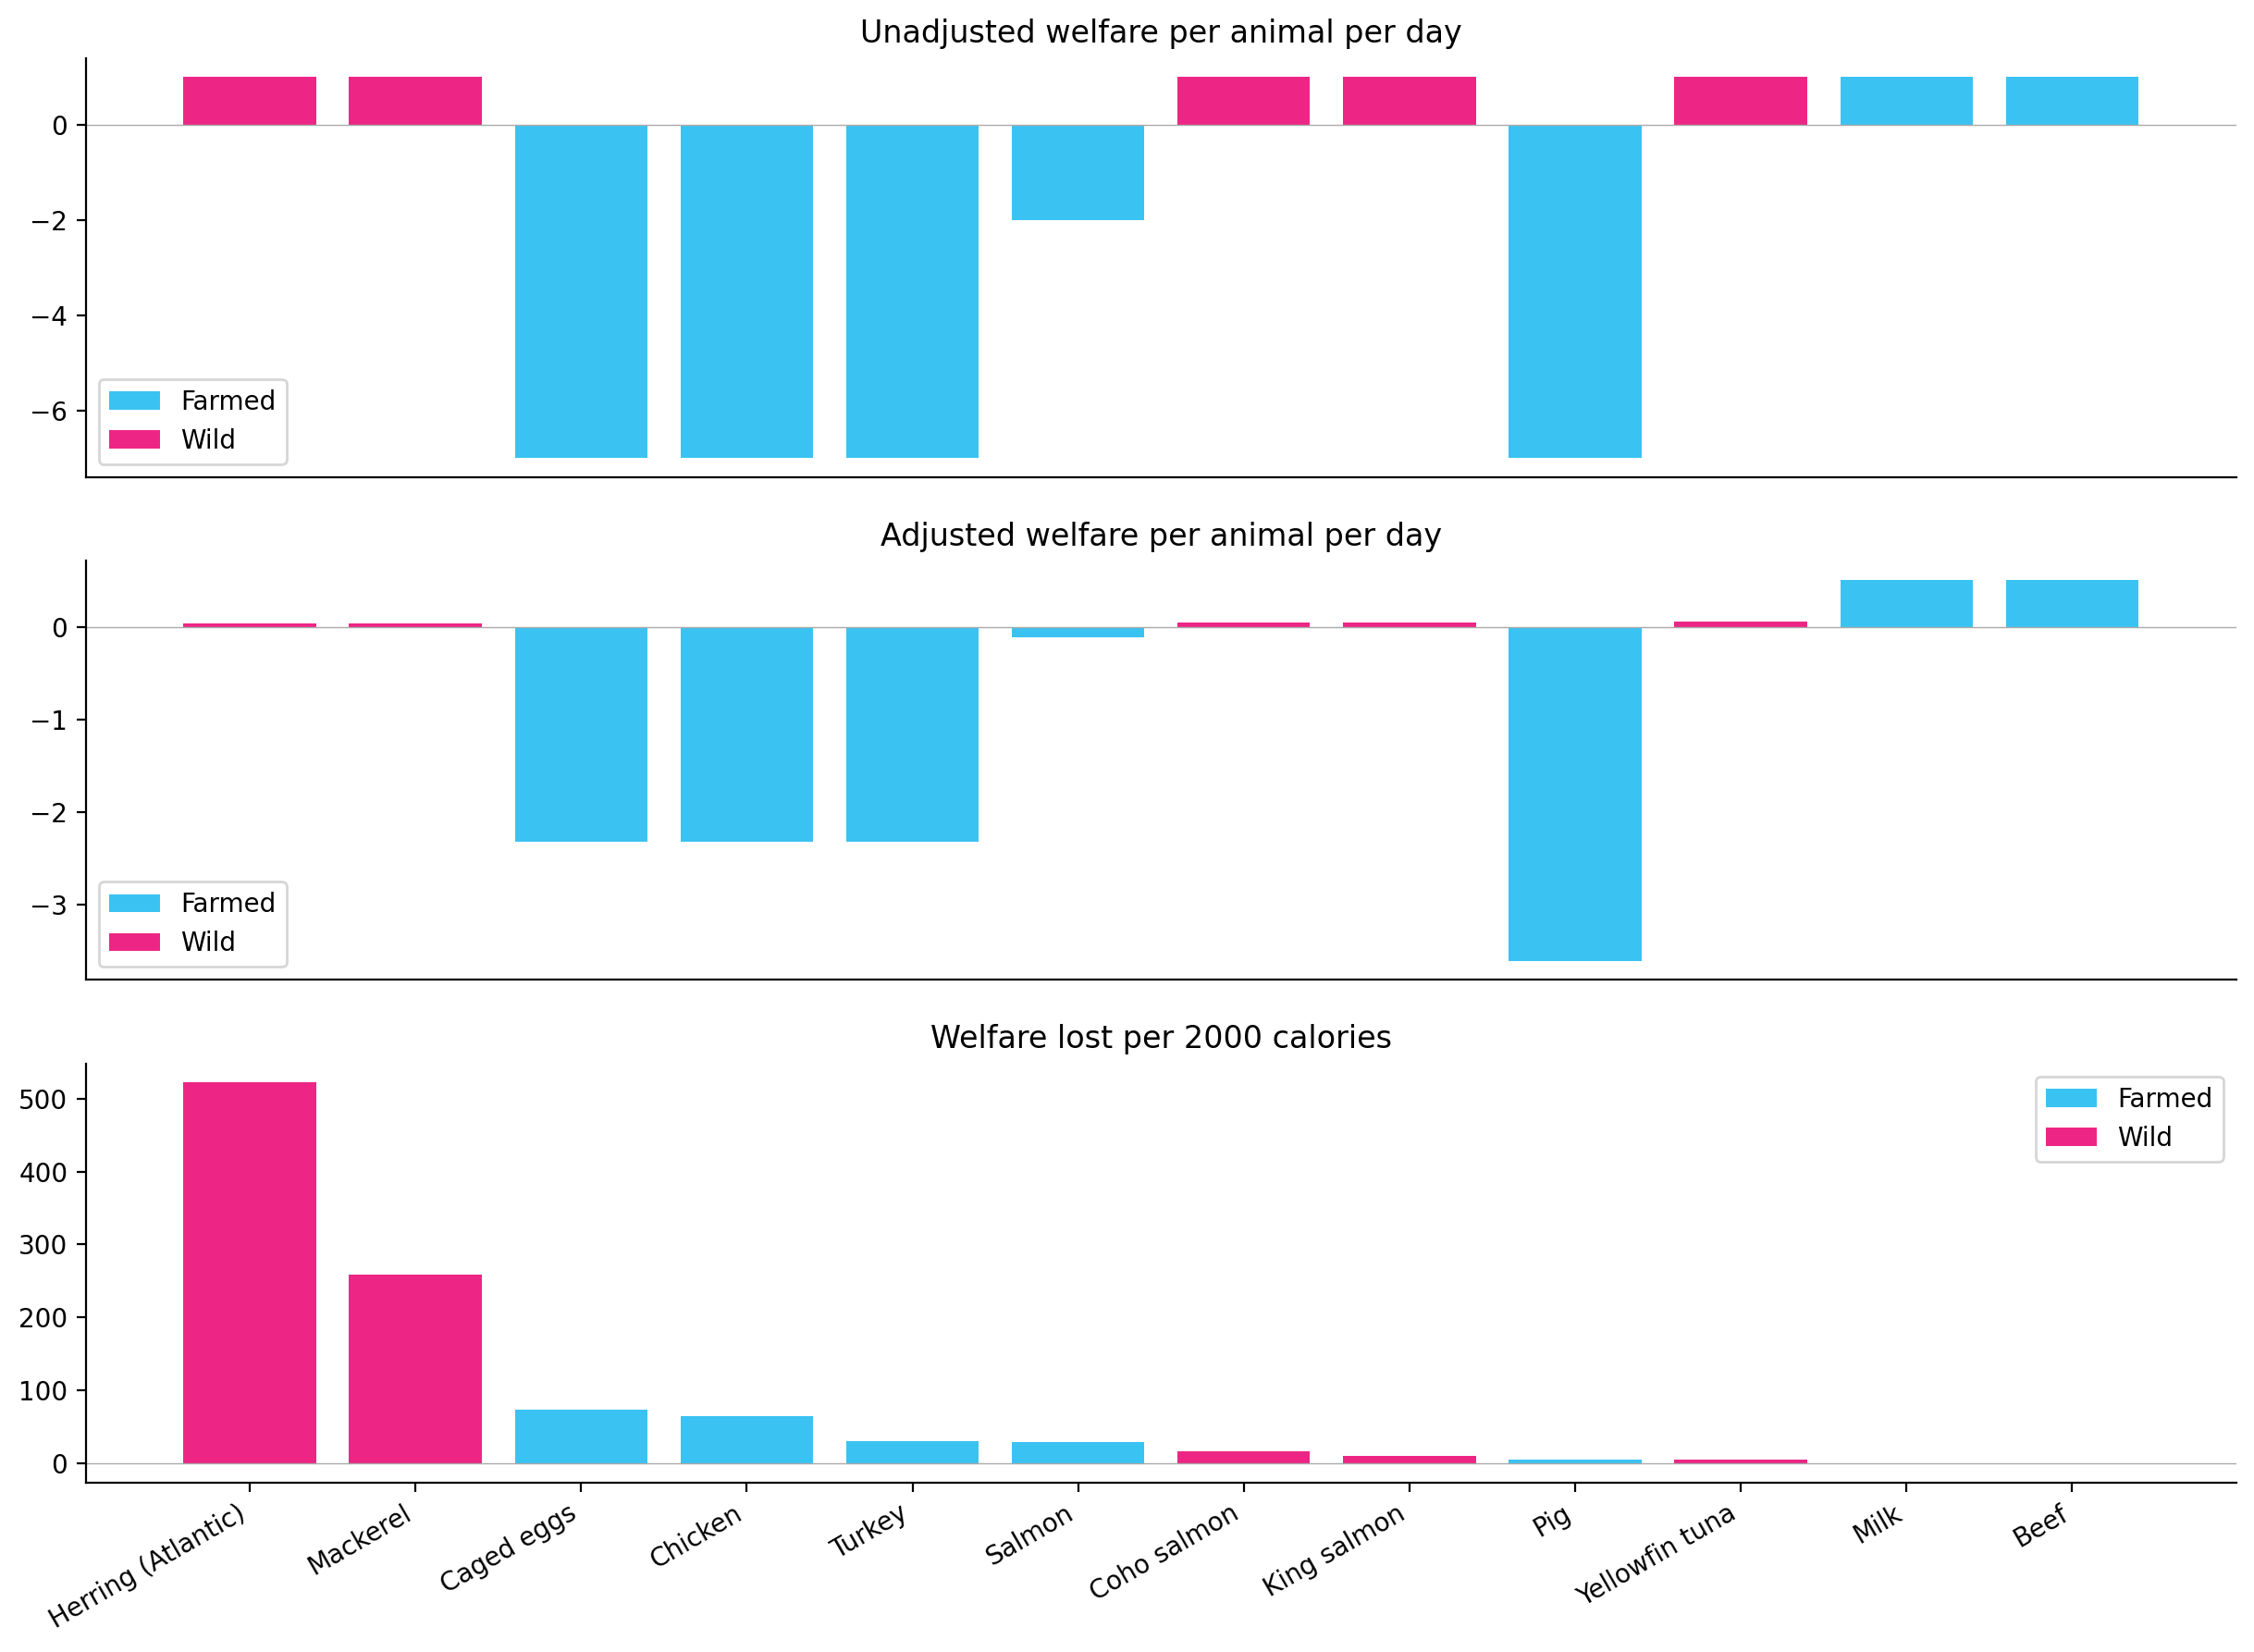

In [24]:
fig, axes = plt.subplots(3, 1, figsize=(15, 10))

plt.sca(axes[0]); plot_combined_bars(df, 'unadjusted_welfare_per_animal_per_day', 'Unadjusted welfare per animal per day', orientation='vertical', include_ticks=False)
plt.sca(axes[1]); plot_combined_bars(df, 'adjusted_welfare_per_animal_per_day', 'Adjusted welfare per animal per day', orientation='vertical', include_ticks=False)
plt.sca(axes[2]); plot_combined_bars(df, 'adjusted_welfare_lost_per_2000_calories', 'Welfare lost per 2000 calories', orientation='vertical', include_ticks=True)


In [25]:
df

,food_label,unadjusted_welfare_per_animal_per_day,adjusted_welfare_per_animal_per_day,adjusted_welfare_lost_per_2000_calories,animal_type
0,Herring (Atlantic),1.0,0.03787,522.250287,wild
1,Mackerel,1.0,0.042267,259.064732,wild
2,Caged eggs,-7.0,-2.324,73.723084,farmed
3,Chicken,-7.0,-2.324,64.650632,farmed
4,Turkey,-7.0,-2.324,30.084112,farmed
5,Salmon,-2.0,-0.112,28.678892,farmed
6,Coho salmon,1.0,0.051097,16.442145,wild
7,King salmon,1.0,0.056,10.297088,wild
8,Pig,-7.0,-3.605,4.876532,farmed
9,Yellowfin tuna,1.0,0.063653,4.226545,wild
